### ONLY RUN THIS CELL WHEN YOU WANT TO DELETE A FOLDER (cannot delete a non-empty folder normally on Colab like in File Explorer)


In [ ]:
# ONLY RUN THIS CELL WHEN YOU WANT TO DELETE A FOLDER (cannot delete normally on Colab like in File Explorer)

import shutil

def remove_folders(folder_names):
    for folder_name in folder_names:
        try:
            shutil.rmtree(folder_name)
            print(f"Folder '{folder_name}' removed successfully.")
        except FileNotFoundError:
            print(f"Folder '{folder_name}' not found.")
        except OSError as e:
            print(f"Error removing '{folder_name}': {e}")

# Put your folder names in the array (example below)
remove_folders(['data'])

Folder 'data' removed successfully.


# ----------------- START HERE -------------------

## Import Dataset from [Kaggle](https://www.kaggle.com/datasets/omkargurav/face-mask-dataset) and [MaskedFace-Net](https://github.com/cabani/MaskedFace-Net) from GitHub

In [ ]:
import kagglehub
import os
import shutil

# Download latest version
kaggle_path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
print("Path to dataset files:", kaggle_path)

without_mask_dataset_path = kaggle_path + "/data/without_mask"
print("Path to without mask dataset", without_mask_dataset_path)

os.makedirs("dataset/without_mask", exist_ok=True)
for file in os.listdir(without_mask_dataset_path):
    shutil.copy(os.path.join(without_mask_dataset_path, file), "/content/dataset/without_mask")

100%|██████████| 163M/163M [00:00<00:00, 200MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1
Path to without mask dataset /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data/without_mask


In [ ]:
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile, os, shutil, random

# A function that counts the number of files in a folder
def count_files_in_folder(folder_path):
    """Counts the number of files in a given folder.

    Args:
        folder_path: The path to the folder.

    Returns:
        The number of files in the folder, or -1 if the folder does not exist.
    """
    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' not found.")
        return -1

    count = 0
    for _, _, files in os.walk(folder_path):
        count += len(files)
    return count

# Extract zip files
def extract_zip_file(zip_path, extract_to):
    """Extracts a zip file to a given directory and prints the number of image files extracted."""
    print(f"📦 Extracting {zip_path} to {extract_to}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # Count image files
    image_count = 0
    for root, _, files in os.walk(extract_to):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_count += 1

    print(f"✅ Extracted {image_count} image files from {zip_path}")

# Sample images from extract files
def sample_images(src_dir, dest_dir, start_idx=0, num_samples=5000, prefix="cmfd"):
    """
    Randomly selects images from a folder (and its subfolders),
    renames them sequentially, and copies them to a destination folder.

    Args:
        src_dir (str): Source directory containing images (with subfolders)
        dest_dir (str): Destination folder to copy sampled images
        start_idx (int): Starting index for renaming
        num_samples (int): Number of images to sample
        prefix (str): Prefix for new filenames
    """
    print(f"Sampling {num_samples} images from {src_dir} to {dest_dir} starting at index {start_idx}...")
    os.makedirs(dest_dir, exist_ok=True)

    # Walk through all subfolders
    all_images = []
    for root, _, files in os.walk(src_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.png')):
                all_images.append(os.path.join(root, file))

    print(f"Found {len(all_images)} images in total.")

    # Randomly sample
    sampled = random.sample(all_images, min(num_samples, len(all_images)))

    for i, filepath in enumerate(sampled):
        new_idx = start_idx + i
        new_filename = f"{prefix}_{new_idx:05d}.jpg"  # e.g., cmfd_00001.jpg
        shutil.copy(filepath, os.path.join(dest_dir, new_filename))

    print(f"✅ Copied and renamed {len(sampled)} images to {dest_dir}")

    return start_idx + len(sampled)  # return the next available index

In [ ]:
# Paths to your zip files (adjust if needed)
cmfd1 = '/content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/CMFD.zip'
cmfd2 = '/content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/CMFD1.zip'
imfd1 = '/content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/IMFD.zip'
imfd2 = '/content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/IMFD1.zip'

### **File Extraction** (this step will take a while)

In [ ]:
# This file extraction step will take around 15 minutes or so. Please be patient!

# CMFD Part 1 - 33686 image files
extract_zip_file(cmfd1, '/content/extracted_data/cmfd_p1')
# CMFD Part 2 - 33686 image files
extract_zip_file(cmfd1, '/content/extracted_data/cmfd_p2')
# IMFD Part 1 - 33553 image files
extract_zip_file(imfd1, '/content/extracted_data/imfd_p1')
# IMFD Part 2 - 33181 image files
extract_zip_file(imfd2, '/content/extracted_data/imfd_p2')

📦 Extracting /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/CMFD.zip to /content/extracted_data/cmfd_p1...
✅ Extracted 33686 image files from /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/CMFD.zip
📦 Extracting /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/CMFD.zip to /content/extracted_data/cmfd_p2...
✅ Extracted 33686 image files from /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/CMFD.zip
📦 Extracting /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/IMFD.zip to /content/extracted_data/imfd_p1...
✅ Extracted 33553 image files from /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/IMFD.zip
📦 Extracting /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/IMFD1.zip to /content/extracted_data/imfd_p2...
✅ Extracted 33181 image files from /content/drive/MyDrive/CS 4210/MaskedFaceNetDataset/IMFD1.zip


### Sample images to 6,000 images for correctly worn and incorrectly worn mask (e.g., 6,000 images per class)

In [ ]:
# Sample images (randomly selecte 5000 images from each folder)
# CMFD
next_idx_cmfd1 = sample_images('/content/extracted_data/cmfd_p1', '/content/dataset/cmfd_6k', start_idx=0, num_samples=3000, prefix="cmfd")
next_idx_cmfd2 = sample_images('/content/extracted_data/cmfd_p2', '/content/dataset/cmfd_6k', start_idx=next_idx_cmfd1, num_samples=3000, prefix="cmfd")
# IMFD
next_idx_imfd1 = sample_images('/content/extracted_data/imfd_p1', '/content/dataset/imfd_6k', start_idx=next_idx_cmfd2, num_samples=3000, prefix="imfd")
sample_images('/content/extracted_data/imfd_p2', '/content/dataset/imfd_6k', start_idx=next_idx_imfd1, num_samples=3000, prefix="imfd")

Sampling 3000 images from /content/extracted_data/cmfd_p1 to /content/dataset/cmfd_6k starting at index 0...
Found 33686 images in total.
✅ Copied and renamed 3000 images to /content/dataset/cmfd_6k
Sampling 3000 images from /content/extracted_data/cmfd_p2 to /content/dataset/cmfd_6k starting at index 3000...
Found 33686 images in total.
✅ Copied and renamed 3000 images to /content/dataset/cmfd_6k
Sampling 3000 images from /content/extracted_data/imfd_p1 to /content/dataset/imfd_6k starting at index 6000...
Found 33553 images in total.
✅ Copied and renamed 3000 images to /content/dataset/imfd_6k
Sampling 3000 images from /content/extracted_data/imfd_p2 to /content/dataset/imfd_6k starting at index 9000...
Found 33181 images in total.
✅ Copied and renamed 3000 images to /content/dataset/imfd_6k


12000

In [ ]:
num_files_in_without_mask = count_files_in_folder('/content/dataset/without_mask')
num_files_in_cmfd_6k = count_files_in_folder('/content/dataset/cmfd_6k')
num_files_in_imfd_6k = count_files_in_folder('/content/dataset/imfd_6k')

print(f"Number of files in without_mask: {num_files_in_without_mask}")
print(f"Number of files in cmfd_6k: {num_files_in_cmfd_6k}")
print(f"Number of files in imfd_6k: {num_files_in_imfd_6k}")
print(f"Total: {num_files_in_without_mask + num_files_in_cmfd_6k + num_files_in_imfd_6k}")

Number of files in without_mask: 3828
Number of files in cmfd_6k: 6000
Number of files in imfd_6k: 6000
Total: 15828


## **Preprocessing**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Define paths to your datasets (change to your actual path)
masked_correct_dir = "/content/dataset/cmfd_6k"
masked_incorrect_dir = "/content/dataset/imfd_6k"
no_mask_dir = "/content/dataset/without_mask"

# Set label mapping
label_map = {
    "correct": 0,
    "incorrect": 1,
    "no_mask": 2
}

### **Scaling and Cropping**

In [ ]:
# Load images and assign labels
def load_images_from_folder(folder, label, img_size=(128, 128)):
    images, labels = [], []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.png')):
            path = os.path.join(folder, filename)
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label)
    return images, labels

In [ ]:
# 5. Load data from each category
correct_imgs, correct_labels = load_images_from_folder(masked_correct_dir, label_map["correct"])
incorrect_imgs, incorrect_labels = load_images_from_folder(masked_incorrect_dir, label_map["incorrect"])
no_mask_imgs, no_mask_labels = load_images_from_folder(no_mask_dir, label_map["no_mask"])

In [ ]:
# Combine all datasets
all_images = np.array(correct_imgs + incorrect_imgs + no_mask_imgs)
all_labels = np.array(correct_labels + incorrect_labels + no_mask_labels)

### **Splitting datasets**

In [ ]:
# Split into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# print(count_files_in_folder("/content/data/without_mask"))
print(f"Training set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")

Training set: 12662
Validation set: 1583
Test set: 1583


### **View demo of sample images from the training set**

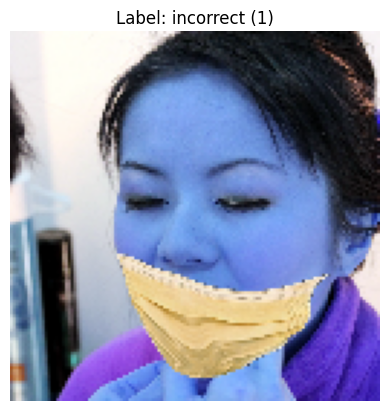

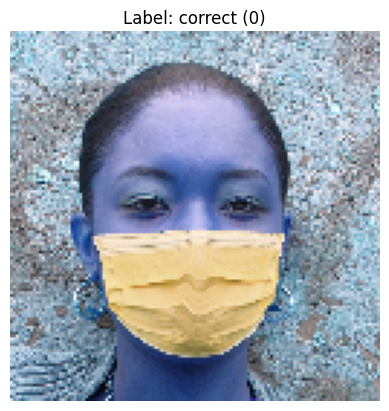

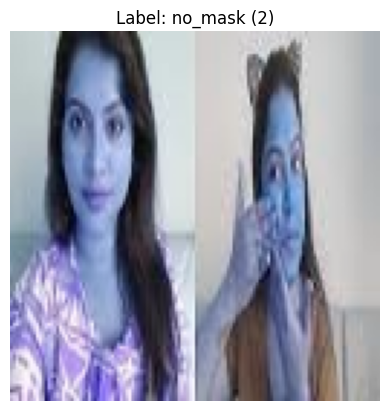

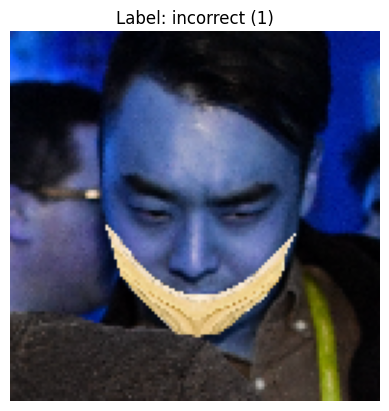

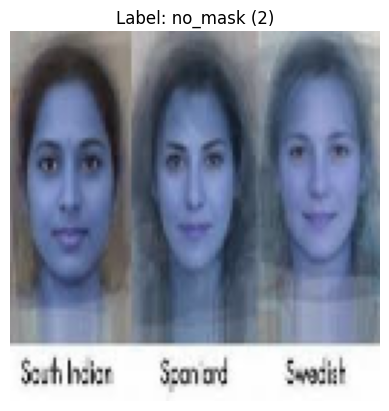

In [ ]:
# Show sample images from the training set
for i in range(5):
    plt.imshow(X_train[i])
    label_num = y_train[i]
    label_name = [k for k, v in label_map.items() if v == label_num][0]
    plt.title(f"Label: {label_name} ({label_num})") #Added label name
    plt.axis('off')
    plt.show()

### **Data Augmentation**
- **Training** - Augment images on the fly (rotation, flip, zoom, brightness)
- **Validation** - Only normalize (no augmentation, fair evaluation)
- **Test** - Only normalize (final evaluation, no tricks)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=15,         # Rotate images randomly up to 15 degrees
    width_shift_range=0.1,     # Shift images horizontally (10% of width)
    height_shift_range=0.1,    # Shift images vertically (10% of height)
    horizontal_flip=True,      # Randomly flip images horizontally
    zoom_range=0.1,            # Random zoom into images
    brightness_range=[0.8, 1.2] # Random brightness adjustment
)

# 2. Validation and Test Data — Only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Create generators
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_test_datagen.flow(
    X_val, y_val,
    batch_size=32,
    shuffle=False
)

test_generator = val_test_datagen.flow(
    X_test, y_test,
    batch_size=32,
    shuffle=False
)

print("✅ Data Augmentation Setup Complete!")

✅ Data Augmentation Setup Complete!


**View demo of augmented images**

(32, 128, 128, 3)


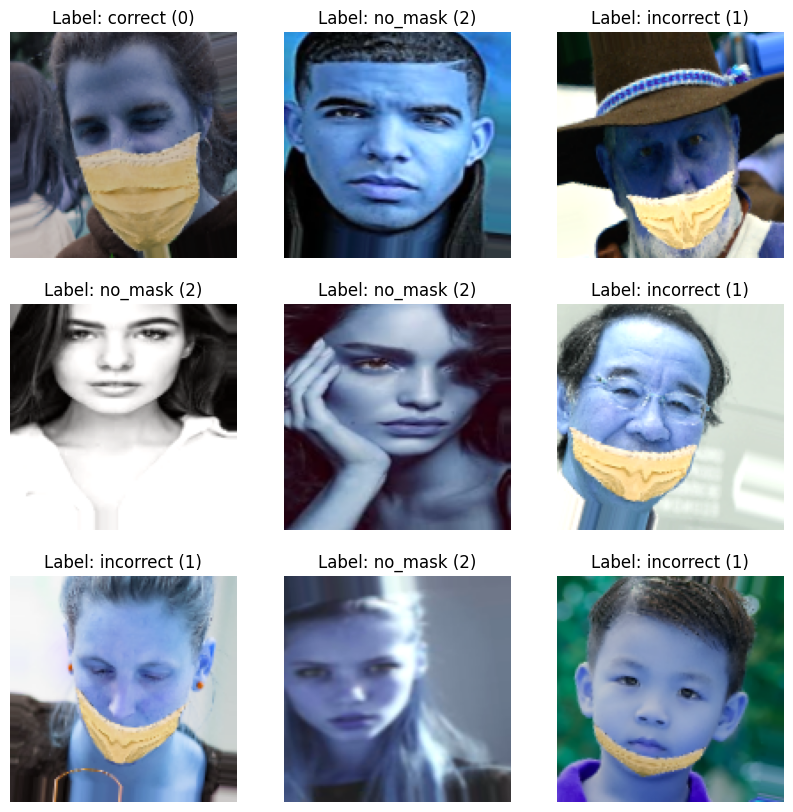

In [ ]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)
print(x_batch.shape)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow((x_batch[i] * 255).astype("uint8"))  # Fix black display
    label_num = y_batch[i]
    label_name = [k for k, v in label_map.items() if v == label_num][0]
    plt.title(f"Label: {label_name} ({label_num})") #Added label name
    plt.axis('off')
plt.show()

## **Model Development**

### Structure all the layers of the CNN model
- **Conv2D(32 filters) + BatchNormalization + MaxPooling** - Low-level feature detection
- **Conv2D(64 filters) + BatchNormalization + MaxPooling** - Mid-level feature detection
- **Conv2D(128 filters) + BatchNormalization + MaxPooling** - High-level feature detection
- **Flatten + Dense(128) + Dropout(0.5) + Dense(3)** - Classifier head

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Convolutional Block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Flatten + Fully Connected
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Correct, Incorrect, No Mask
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,923 (12.61 MB)

 Trainable params: 3,305,475 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

### **Compile the model**

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### **Include EarlyStopping and ModelCheckpoint**
- **EarlyStopping** - Stops training automatically when validation loss stops improving.
- **ModelCheckpoint** - Saves the best model weights during training whenever val_loss improves



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_face_mask_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, checkpoint]

### Train the model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,       # you can adjust to 10-30 depending on results
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_val) // 32,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8658 - loss: 0.8814
Epoch 1: val_loss improved from inf to 0.23761, saving model to best_face_mask_model.h5


395/395 ━━━━━━━━━━━━━━━━━━━━ 74s 165ms/step - accuracy: 0.8660 - loss: 0.8799 - val_accuracy: 0.9381 - val_loss: 0.2376
Epoch 2/20
  1/395 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9062 - loss: 0.3276

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.23761 to 0.21208, saving model to best_face_mask_model.h5


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3276 - val_accuracy: 0.9432 - val_loss: 0.2121
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9726 - loss: 0.0832
Epoch 3: val_loss improved from 0.21208 to 0.04160, saving model to best_face_mask_model.h5


395/395 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.9726 - loss: 0.0832 - val_accuracy: 0.9828 - val_loss: 0.0416
Epoch 4/20
  1/395 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9688 - loss: 0.0459
Epoch 4: val_loss improved from 0.04160 to 0.04043, saving model to best_face_mask_model.h5


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0459 - val_accuracy: 0.9815 - val_loss: 0.0404
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9761 - loss: 0.0871
Epoch 5: val_loss did not improve from 0.04043
395/395 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.9761 - loss: 0.0872 - val_accuracy: 0.3546 - val_loss: 5.8246
Epoch 6/20
  1/395 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9688 - loss: 0.0620
Epoch 6: val_loss did not improve from 0.04043
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0620 - val_accuracy: 0.3890 - val_loss: 5.0329
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9777 - loss: 0.0833
Epoch 7: val_loss did not improve from 0.04043
395/395 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.9777 - loss: 0.0833 - val_accuracy: 0.7487 - val_loss: 0.8534
Epoch 8/20
  1/395 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 1.0000 - loss: 0.0169
Epoch 8: val_loss did not improve f

395/395 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.9854 - loss: 0.0460 - val_accuracy: 0.9943 - val_loss: 0.0153
Epoch 14/20
  1/395 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 14: val_loss did not improve from 0.01525
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9930 - val_loss: 0.0173
Epoch 15/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9891 - loss: 0.0315
Epoch 15: val_loss did not improve from 0.01525
395/395 ━━━━━━━━━━━━━━━━━━━━ 82s 208ms/step - accuracy: 0.9891 - loss: 0.0315 - val_accuracy: 0.9088 - val_loss: 0.3263
Epoch 16/20
  1/395 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 1.0000 - loss: 0.0317
Epoch 16: val_loss did not improve from 0.01525
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 0.8782 - val_loss: 0.4581
Epoch 17/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9860 - loss: 0.0414
Epoch 17: val_loss did not i

In [ ]:
from tensorflow.keras.models import load_model

# Load the newer Keras-format model
best_model = load_model('best_face_mask_model.h5')

## **Evaluation**

In [ ]:
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9910 - loss: 0.0165
✅ Test Accuracy: 99.31%


### Plot Training and Validation Curves

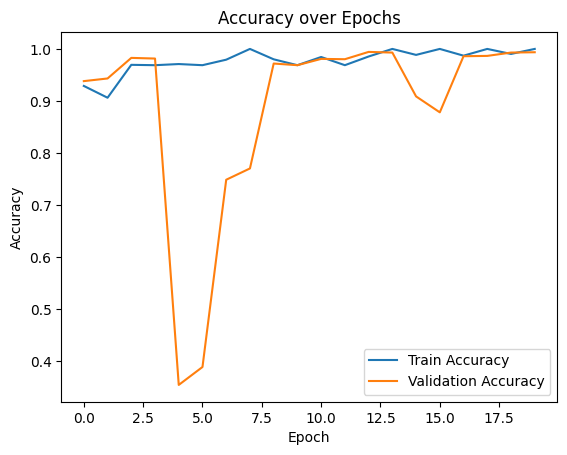

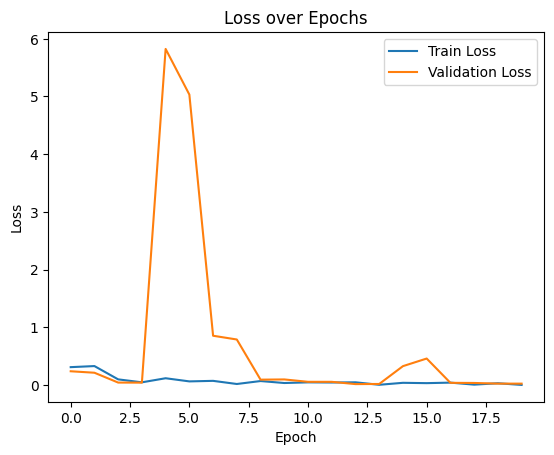

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


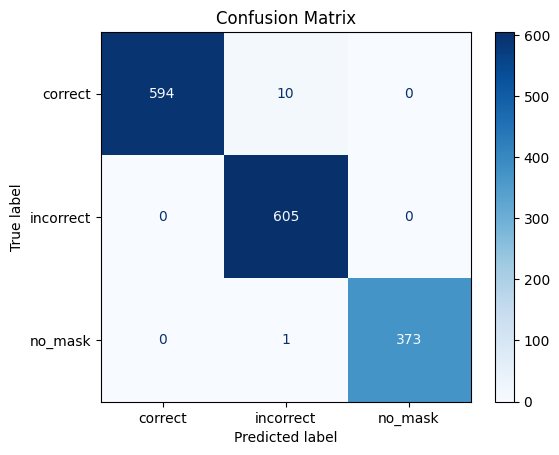

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_probs = best_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test # Access the true labels directly from y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(label_map)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Predict labels
y_pred_probs = best_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted') # Use weighted average for multi-class
print(f"✅ F1 Score: {f1:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
✅ F1 Score: 0.9931
